# Super store Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Corrected the module name from 'matlplotlib' to 'matplotlib'
import seaborn as sns

store = pd.read_excel(r'/content/Sample - Superstore.xls')


# finding duplicates
store.duplicated().sum()

# Define the custom color palette
custom_palette = [
    "#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F",
    "#EDC949", "#AF7AA1", "#FF9DA7", "#9C755F", "#BAB0AC"
]

# Set the color palette in Seaborn
sns.set_palette(custom_palette)

store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


1.  ## Sales Performance Analysis

Problem: You analyzed the overall sales performance of the Superstore over time.
Tasks:
Calculated total sales by year, quarter, and month.
Identified the best and worst-performing months.
Visualized sales trends using line charts and bar plots.
Analyzed the impact of discounts on sales.
Skills Demonstrated: Data aggregation, time series analysis, and data visualization with Matplotlib/Seaborn.

In [ ]:
# creating monthly_sales column
store['Monthly_sales'] = store['Order Date'].dt.to_period('M')
print(store.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-

Best performing Months : 
 Row ID                                                        2698
Order ID                                            CA-2014-145317
Order Date                                     2014-03-18 00:00:00
Ship Date                                      2014-03-23 00:00:00
Ship Mode                                           Standard Class
Customer ID                                               SM-20320
Customer Name                                          Sean Miller
Segment                                                Home Office
Country                                              United States
City                                                  Jacksonville
State                                                      Florida
Postal Code                                                  32216
Region                                                       South
Product ID                                         TEC-MA-10002412
Category                           

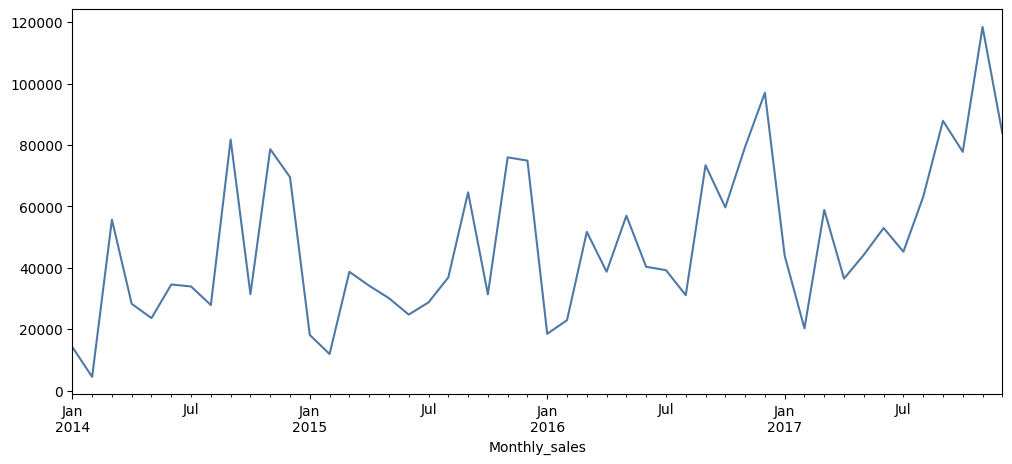

In [ ]:
store.groupby('Monthly_sales')['Sales'].sum().plot(figsize=(12,5))

## Identify best and worst-performing months
best_month =store.loc[store['Sales'].idxmax()] # returns index of best performing month
worst_month = store.loc[store['Sales'].idxmin()]  # returns index of worst performing month

print('Best performing Months : \n' , best_month)
print('Worst performing Months : \n',worst_month)

<ipython-input-18-be5ccc6b953f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discountvssales = store.groupby('Discount_groups').agg({


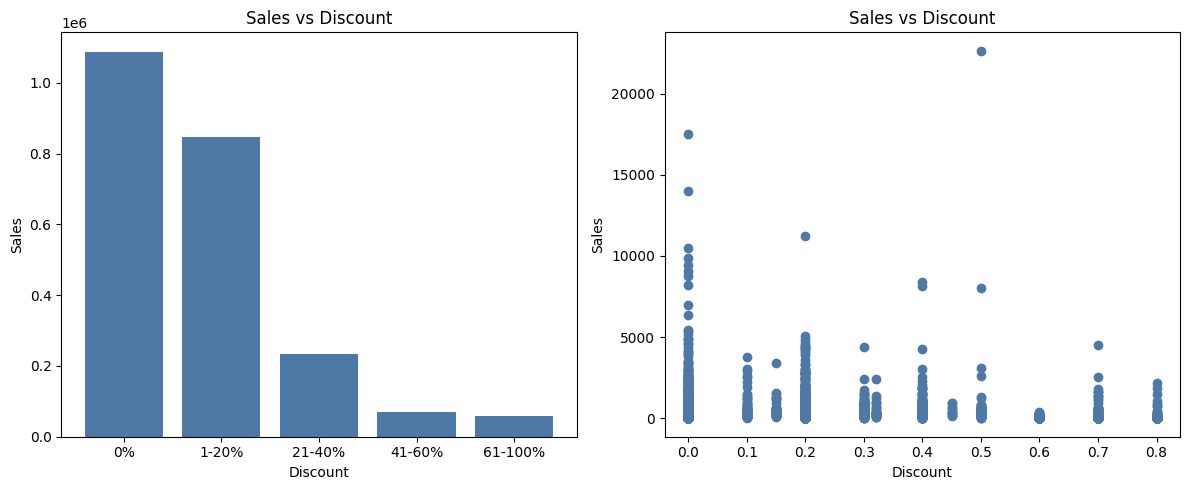

In [ ]:
# impact of discount on sales
# grouping discount
store['Discount_groups'] = pd.cut(store['Discount'],bins=[-1.0,0,0.2,0.4,0.6,1.0],labels=['0%','1-20%','21-40%','41-60%','61-100%'])

discountvssales = store.groupby('Discount_groups').agg({
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

fig, axes = plt.subplots(1,2,figsize=(12,5))
# plot 1
axes[0].bar(discountvssales['Discount_groups'],discountvssales['Sales'])
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Sales')
axes[0].set_title('Sales vs Discount')

# plot 2
axes[1].scatter(store['Discount'],store['Sales'])
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Sales')
axes[1].set_title('Sales vs Discount')

plt.tight_layout()
plt.show()

2. # Profitability Analysis

Problem: Investigated the profitability of different product categories and sub-categories.
Tasks:
Calculated profit margins for each category and sub-category.
Identified products with high and low-profit margins.
Analyzed the relationship between sales volume and profitability.
Skills Demonstrated: Data aggregation, profit margin calculation, correlation analysis, and data visualization with Matplotlib/Seaborn.

In [ ]:
profit = store.groupby(['Category','Sub-Category']).agg({
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

# profit margin
profit['Profit_margin'] = (profit['Profit'] / profit['Sales'])*100
print(profit)

# product category with high profit margin
print('High profit margin products : \n ', profit.loc[profit['Profit_margin'].idxmax()])
# product category with low profit margin
print('Low profit margin products : \n', profit.loc[profit['Profit_margin'].idxmin()])

           Category Sub-Category        Sales      Profit  Profit_margin
0         Furniture    Bookcases  114879.9963  -3472.5560      -3.022768
1         Furniture       Chairs  328449.1030  26590.1663       8.095673
2         Furniture  Furnishings   91705.1640  13059.1436      14.240358
3         Furniture       Tables  206965.5320 -17725.4811      -8.564460
4   Office Supplies   Appliances  107532.1610  18138.0054      16.867517
5   Office Supplies          Art   27118.7920   6527.7870      24.071083
6   Office Supplies      Binders  203412.7330  30221.7633      14.857361
7   Office Supplies    Envelopes   16476.4020   6964.1767      42.267582
8   Office Supplies    Fasteners    3024.2800    949.5182      31.396504
9   Office Supplies       Labels   12486.3120   5546.2540      44.418672
10  Office Supplies        Paper   78479.2060  34053.5693      43.391837
11  Office Supplies      Storage  223843.6080  21278.8264       9.506113
12  Office Supplies     Supplies   46673.5380  -118

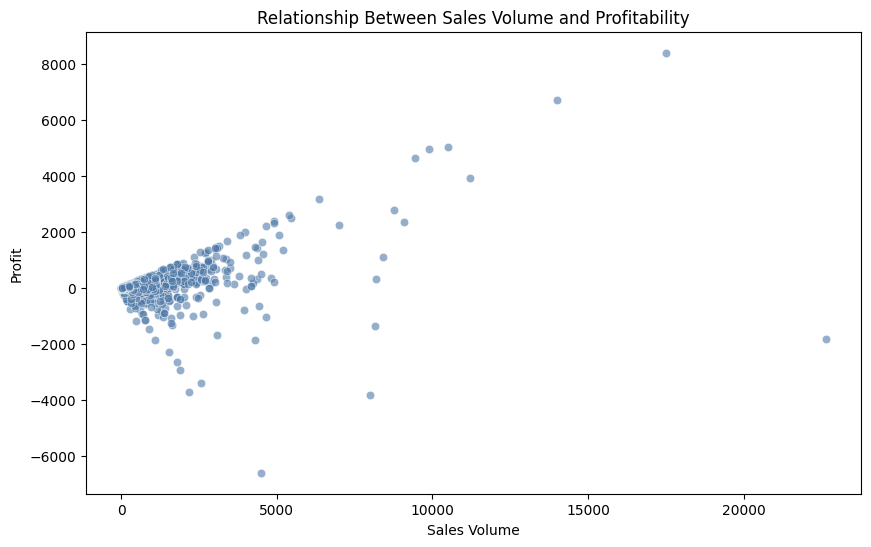

Correlation between Sales and Profit:
            Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000


In [ ]:
# Analyze relationship between Sales Volume and Profitability
plt.figure(figsize=(10, 6))
sns.scatterplot(x=store['Sales'], y=store['Profit'], alpha=0.6)
plt.xlabel("Sales Volume")
plt.ylabel("Profit")
plt.title("Relationship Between Sales Volume and Profitability")
plt.show()

# Compute correlation between Sales and Profit
correlation = store[['Sales', 'Profit']].corr()
print("Correlation between Sales and Profit:\n", correlation)


3. # Customer Segmentation

### Problem:Segmented customers based on their purchasing behavior using RFM analysis (Recency, Frequency, Monetary Value).
#### Tasks:
Calculated RFM scores for each customer.
Segmented customers into different loyalty levels (High, Medium, Low).
Analyzed the distribution of customers across segments.
Skills Demonstrated: RFM analysis, customer segmentation, and data aggregation.

In [ ]:
# Customer Segmentation based on RFM (Recency, Frequency, Monetary Value)
import datetime as dt

# Calculate Recency (Days since last purchase)
current_date = store['Order Date'].max()
rfm_data = store.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Calculate recency
    'Order ID': 'count',                                     # Calculate frequency
    'Sales': 'sum'                                          # Calculate monetary value
}).reset_index()
rfm_data.rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Spending'
}, inplace=True)

# rfm score
rfm_data['R_score'] = pd.qcut(rfm_data['Recency'], 5,labels=[5,4,3,2,1])
rfm_data['F_score'] = pd.qcut(rfm_data['Frequency'], 5,labels=[1,2,3,4,5])
rfm_data['M_score'] = pd.qcut(rfm_data['Spending'], 5,labels=[1,2,3,4,5])

rfm_data['RFM_score'] = rfm_data['R_score'].astype(str) + rfm_data['F_score'].astype(str) + rfm_data['M_score'].astype(str)

# customer segmentation
rfm_data['Customer_segment'] = rfm_data['R_score'].astype(int) + rfm_data['F_score'].astype(int) + rfm_data['M_score'].astype(int)


def potential(var):
  if var >=10:
    return 'High'
  elif var >=5:
    return 'Medium'
  elif var >=0:
   return 'Low'

rfm_data['Loyalty'] = rfm_data['Customer_segment'].apply(potential)

rfm_data.groupby('Loyalty').agg({
    'Customer ID':'count'
})

,Customer ID
Loyalty,
High,367
Low,87
Medium,339


4. # Regional Performance Analysis

### Problem: Analyzed sales and profit performance across different regions and states.
##### Tasks:
Calculated total sales and profit for each region.
Calculated profit margins for each region.
Identified top-performing and underperforming states.
Visualized regional sales and profit margins using pie charts and bar plots.
Skills Demonstrated: Data aggregation, regional analysis, profit margin calculation, and data visualization with Matplotlib.

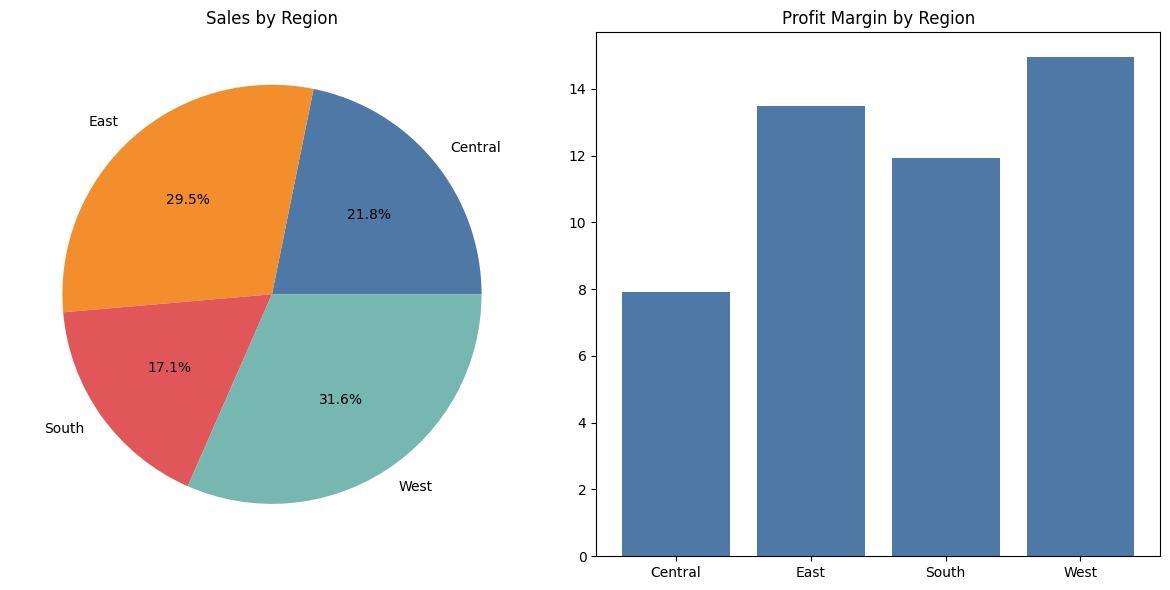

Top Performing States:
                   State      Sales      Profit  Profit_margin
7   District of Columbia   2865.020   1059.5893      36.983662
6               Delaware  27451.069   9977.3748      36.346034
21             Minnesota  29863.150  10823.1874      36.242618
17                 Maine   1270.530    454.4862      35.771387
2               Arkansas  11678.130   4008.6871      34.326447

Underperforming States:
        State        Sales      Profit  Profit_margin
33       Ohio   78258.1360 -16971.3766     -21.686405
4    Colorado   32108.1180  -6527.8579     -20.330864
40  Tennessee   30661.8730  -5341.6936     -17.421289
11   Illinois   80166.1010 -12607.8870     -15.727205
41      Texas  170188.0458 -25729.3563     -15.118192


In [ ]:
region_sales = store.groupby('Region').agg({
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

region_sales['Profit_margin'] = (region_sales['Profit'] / region_sales['Sales'])*100

plt.figure(figsize=(12,6))
#PLOT 1
plt.subplot(1,2,1)
plt.pie(region_sales['Sales'],labels=region_sales['Region'],autopct='%1.1f%%')
plt.title('Sales by Region')

# plot 2
plt.subplot(1,2,2)
plt.bar(region_sales['Region'],region_sales['Profit_margin'])
plt.title('Profit Margin by Region')


plt.tight_layout()
plt.show()

# comparing sales by states
states_sales = store.groupby('State').agg({
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

# Identify the top-performing and underperforming states.
states_sales['Profit_margin'] = states_sales['Profit'] / states_sales['Sales'] * 100
top_states = states_sales.nlargest(5, 'Profit_margin')
bottom_states = states_sales.nsmallest(5, 'Profit_margin')

print("Top Performing States:")
print(top_states)

print("\nUnderperforming States:")
print(bottom_states)

 5. # Inventory Management

Problem: You worked on optimizing inventory levels to reduce costs and avoid stockouts.
Tasks:
Calculated total demand for each product.
Calculated reorder points based on lead time and daily demand.
Calculated inventory turnover ratios.
Calculated safety stock levels.
Considered ordering and holding costs.
Skills Demonstrated: Inventory management techniques, demand forecasting, and cost analysis.

*calculating demand : divides the total quantity sold (100 loaves) by the total order duration (20 days) to calculate the average daily demand: 100 loaves / 20 days = 5 loaves/day.*

Reorder points: Imagine you sell 5 loaves of bread per day (daily_demand), and it takes 7 days for a new order of bread to arrive (lead_time). The reorder point would be 35 loaves (5 loaves/day * 7 days). This means that when your bread inventory drops to 35 loaves, you should place a new order to ensure you don't run out before the next shipment arrives.

Inventory Turnover Ratio: Now, for each product, the code divides the total quantity sold by the total sales value.

Bread: 100 loaves / $300 = 0.33,
Cookies: 200 boxes / $400 = 0.5,
Cakes: 50 cakes / $250 = 0.2

high ratio is better

safety_stock_percentage:
The bakery sells, on average, 10 loaves of bread per day (daily_demand).
It takes 3 days for the bakery to receive a new order of bread from their supplier (lead_time).
The bakery wants to maintain a 20% safety stock (safety_stock_percentage) to avoid running out of bread if there's a sudden increase in demand or if their supplier is late with a delivery.
daily_demand * lead time * 20%


In [ ]:

# Calculate Total Demand and Sales/Profit
demand = store.groupby('Product Name')['Quantity'].sum().reset_index()
demand.columns = ['Product Name', 'Total Quantity Sold']
sales_profit = store.groupby('Product Name')[['Sales', 'Profit']].sum().reset_index()

# Calculate Order Duration and Daily Demand
store['Order Duration'] = (store['Ship Date'] - store['Order Date']).dt.days
daily_demand = store.groupby('Product Name')['Quantity'].sum() / store.groupby('Product Name')['Order Duration'].sum()

# Calculate Reorder Point
lead_time = 7  # Example lead time in days
reorder_point = daily_demand * lead_time
reorder_point_df = pd.DataFrame(reorder_point).reset_index()
reorder_point_df.columns = ['Product Name', 'Reorder Point']
print(reorder_point)

# Calculate Inventory Turnover Ratio
inventory_turnover = store.groupby('Product Name')['Quantity'].sum() / store.groupby('Product Name')['Sales'].sum()
turnover_df = pd.DataFrame(inventory_turnover).reset_index()
turnover_df.columns = ['Product Name', 'Inventory Turnover Ratio']


# Calculate Safety Stock
safety_stock_percentage = 0.2  # 20% safety stock
safety_stock = daily_demand * lead_time * safety_stock_percentage
safety_stock_df = pd.DataFrame(safety_stock).reset_index()
safety_stock_df.columns = ['Product Name', 'Safety Stock']


# Calculate Ordering and Holding Costs:
ordering_cost = 50  # Example ordering cost per order
holding_cost_percentage = 0.2  # 20% of product cost as holding cost
average_cost_per_unit = store.groupby('Product Name')['Sales'].sum() / store.groupby('Product Name')['Quantity'].sum()
holding_cost = average_cost_per_unit * holding_cost_percentage

print(ordering_cost)

Product Name
"While you Were Out" Message Book, One Form per Page                                                    4.307692
#10 Gummed Flap White Envelopes, 100/Box                                                                3.347826
#10 Self-Seal White Envelopes                                                                           4.117647
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              7.466667
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 5.630435
                                                                                                         ...    
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     6.720000
iOttie HLCRIO102 Car Mount                                                                              5.250000
iOttie XL Car Mount                                                                

6 . # Predicting Future Sales

Problem: You built a time series model to predict future sales.
Tasks:
Made the sales data stationary using differencing.
Applied ARIMA and SARIMAX models for forecasting.
Evaluated model performance using metrics like RMSE.
Visualized actual vs. predicted sales.
Skills Demonstrated: Time series analysis, ARIMA/SARIMAX modeling, model evaluation, and data visualization.

ADF Statistic: -9.057697
p-value: 0.000000
The series is stationary.


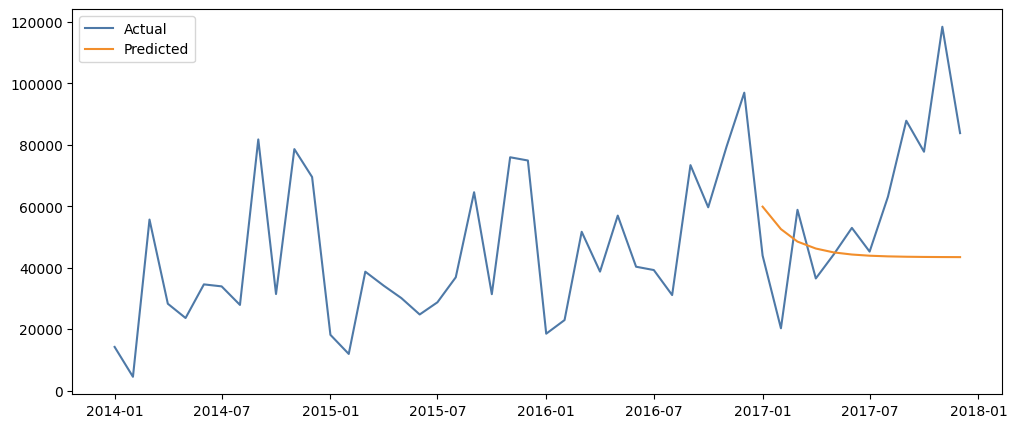

In [ ]:
import numpy as np
pred_sale = store.groupby('Monthly_sales')['Sales'].sum().reset_index() # not stationary

# making it stationary using differencing
pred_sale['Sale_diff'] = pred_sale['Sales'].diff()

# pred_sale[['Monthly_sales','Sale_diff']].plot(figsize=(12,5))

# checking stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(pred_sale['Sale_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print('The series is stationary.')
else:
    print('The series is non-stationary.\n')

# converting monthly sales to datetime
pred_sale['Monthly_sales'] = pred_sale['Monthly_sales'].astype(str)

pred_sale['Monthly_sales'] = pd.to_datetime(pred_sale['Monthly_sales'])


# Split data into train and test sets
train = pred_sale[:-12]  # Use all but the last 12 months for training
test = pred_sale[-12:]   # Use the last 12 months for testing

# applying arima model
from statsmodels.tsa.arima.model import ARIMA
model =ARIMA(train['Sales'],order=(1,0,1))
model_fit = model.fit()
predict = model_fit.predict(start=test.index[0],end=test.index[-1])
pred_sale['Arima_pred'] = predict

pred_sale.set_index('Monthly_sales',inplace=True)

#ploting actual vs predicted value
plt.figure(figsize=(12,5))
plt.plot(pred_sale.index,pred_sale['Sales'],label='Actual')
plt.plot(pred_sale.index,pred_sale['Arima_pred'],label='Predicted')
plt.legend()
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-25-9d38adb4530c>:14: SettingWithCopyWarn

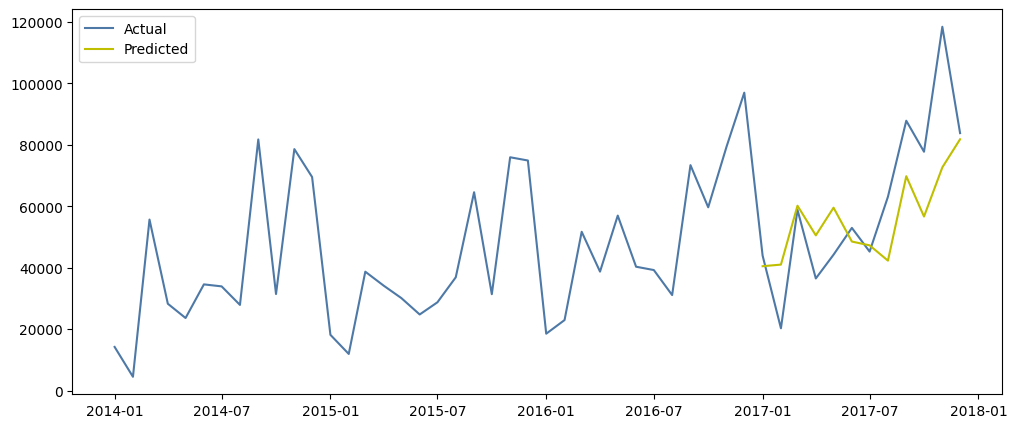

18711.095717292028

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Split data into train and test sets
train = pred_sale[:-12]  # Use all but the last 12 months for training
test = pred_sale[-12:]   # Use the last 12 months for testing

# Fit the SARIMAX model
model = SARIMAX(train['Sales'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Assign predictions to the test DataFrame
test['SARIMAX_pred'] = predictions  # Assign using index alignment

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))
plt.plot(pred_sale.index, pred_sale['Sales'], label='Actual')
plt.plot(test.index, test['SARIMAX_pred'], label='Predicted', color='y')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
np.sqrt( mean_squared_error(test['Sales'], test['SARIMAX_pred']))
